In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras

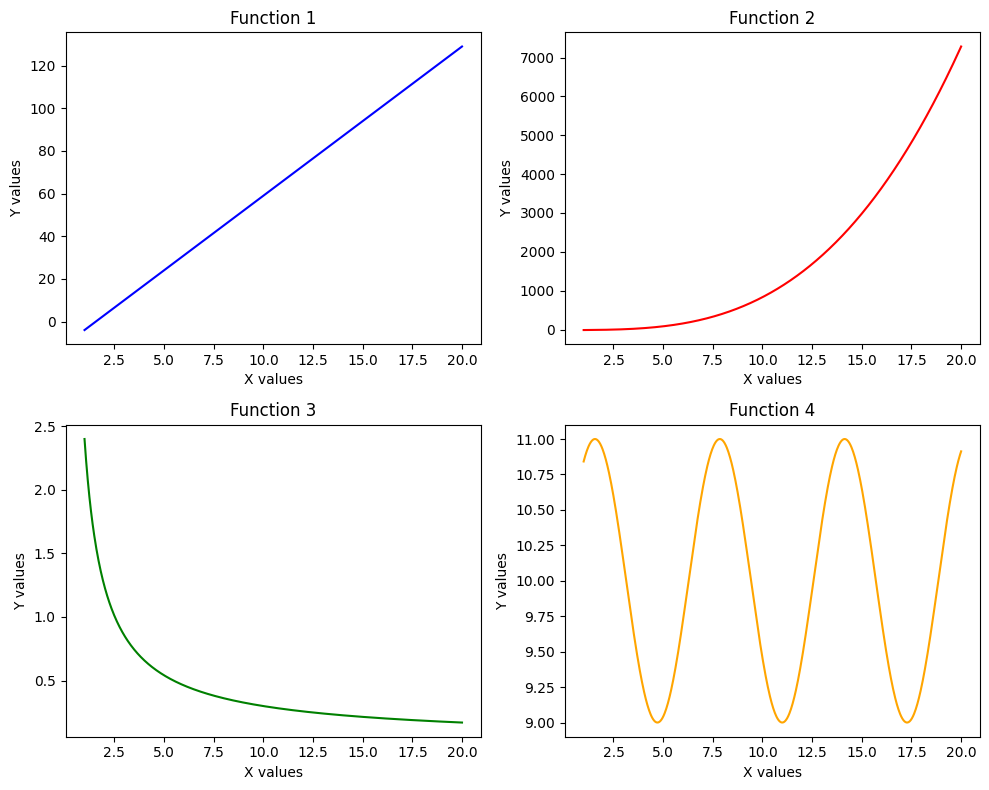

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def function_1(x):
    return 7 * x - 11

def function_2(x):
    y = x ** 3 - 2 * x ** 2 + 5 * x - 17
    y[np.isnan(y)] = 0  # Replace NaN values with 0
    return y

def function_3(x):
    y = np.log(x + 10) / x
    y[np.isnan(y)] = 0  # Replace NaN values with 0
    return y

def function_4(x):
    return np.sin(x) + 10

# Generate x values
x = np.linspace(1, 20, 700)

# Generate y values for each function and handle NaN values
y_values_1 = function_1(x)
y_values_2 = function_2(x)
y_values_3 = function_3(x)
y_values_4 = function_4(x)

# Check for NaN values in y_values after handling
if np.isnan(y_values_1).any() or np.isnan(y_values_2).any() or np.isnan(y_values_3).any() or np.isnan(y_values_4).any():
    raise ValueError("Input y contains NaN values.")

# Plot each function in a separate plot
plt.figure(figsize=(10, 8))

# Plot for function 1
plt.subplot(221)
plt.plot(x, y_values_1, color='blue')
plt.title('Function 1')
plt.xlabel('X values')
plt.ylabel('Y values')

# Plot for function 2
plt.subplot(222)
plt.plot(x, y_values_2, color='red')
plt.title('Function 2')
plt.xlabel('X values')
plt.ylabel('Y values')

# Plot for function 3
plt.subplot(223)
plt.plot(x, y_values_3, color='green')
plt.title('Function 3')
plt.xlabel('X values')
plt.ylabel('Y values')

# Plot for function 4
plt.subplot(224)
plt.plot(x, y_values_4, color='orange')
plt.title('Function 4')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.tight_layout()
plt.show()

Epoch 1/100
18/18 [==============================] - 3s 7ms/step - loss: 2614.9622
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 1271.9037
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 228.3019
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 52.6070
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 36.3401
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 33.7400
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 31.9508
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 30.3949
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 29.1111
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 27.6798
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 26.3689
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 24.9368
Epoch 13/100
18/18 [

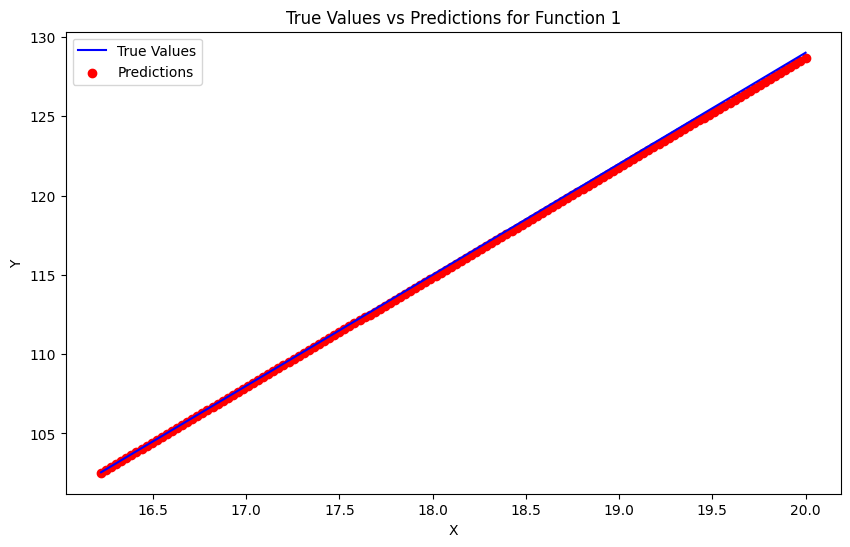

In [4]:
# Determine the split index for 80-20 split
split_index = int(0.8 * len(x))

# Split the data into train and test sets without shuffling
x_train_1, x_test_1 = x[:split_index], x[split_index:]
y_train_1, y_test_1 = y_values_1[:split_index], y_values_1[split_index:]

# Sort x_train_1 in ascending order
sorted_indices = np.argsort(x_train_1)
x_train_sorted_1 = x_train_1[sorted_indices]
y_train_sorted_1 = y_train_1[sorted_indices]

# Reshape input data to have a shape of (batch_size, 1)
x_train_sorted_1 = x_train_sorted_1.reshape(-1, 1)
x_test_1 = x_test_1.reshape(-1, 1)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(units=100, activation='relu', input_shape=(1,)),
    keras.layers.Dense(units=300, activation='relu'),
    keras.layers.Dense(units=1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x_train_sorted_1, y_train_sorted_1, epochs=100, batch_size=32)

# Make predictions
predictions_1 = model.predict(x_test_1)

# Calculate R-squared score
r_squared_1 = r2_score(y_test_1, predictions_1)
r_squared_percentage_1 = r_squared_1 * 100
print("R-squared Score:", r_squared_percentage_1, "%")

# Calculate MSE for train and test data
train_mse_1 = model.evaluate(x_train_sorted_1, y_train_sorted_1, verbose=0)
test_mse_1 = model.evaluate(x_test_1, y_test_1, verbose=0)
print("Train MSE:", train_mse_1)
print("Test MSE:", test_mse_1)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(x_test_1, y_test_1, color='blue', label='True Values')
plt.scatter(x_test_1, predictions_1, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('True Values vs Predictions for Function 1')
plt.legend()
plt.show()

Epoch 1/300
18/18 [==============================] - 2s 4ms/step - loss: 2018208.5000
Epoch 2/300
18/18 [==============================] - 0s 3ms/step - loss: 1351237.2500
Epoch 3/300
18/18 [==============================] - 0s 3ms/step - loss: 527067.6250
Epoch 4/300
18/18 [==============================] - 0s 4ms/step - loss: 443169.7812
Epoch 5/300
18/18 [==============================] - 0s 3ms/step - loss: 396574.1250
Epoch 6/300
18/18 [==============================] - 0s 3ms/step - loss: 332743.5000
Epoch 7/300
18/18 [==============================] - 0s 3ms/step - loss: 259555.1406
Epoch 8/300
18/18 [==============================] - 0s 3ms/step - loss: 154500.4219
Epoch 9/300
18/18 [==============================] - 0s 3ms/step - loss: 67738.9609
Epoch 10/300
18/18 [==============================] - 0s 3ms/step - loss: 44599.4648
Epoch 11/300
18/18 [==============================] - 0s 3ms/step - loss: 34264.4141
Epoch 12/300
18/18 [==============================] - 0s 3ms/ste

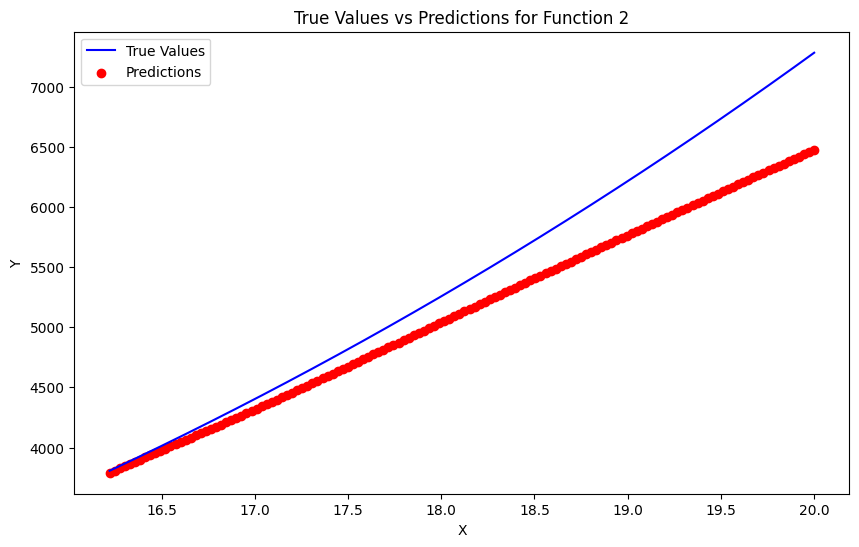

In [5]:
# Determine the split index for 80-20 split
split_index = int(0.8 * len(x))

# Split the data into train and test sets without shuffling
x_train_2, x_test_2 = x[:split_index], x[split_index:]
y_train_2, y_test_2 = y_values_2[:split_index], y_values_2[split_index:]

# Sort x_train_2 in ascending order
sorted_indices = np.argsort(x_train_2)
x_train_sorted_2 = x_train_2[sorted_indices]
y_train_sorted_2 = y_train_2[sorted_indices]

# Define the model
model = keras.Sequential([
    keras.layers.Dense(units=100, activation='elu', input_shape=(1,)),
    keras.layers.Dense(units=500, activation='swish'),
    keras.layers.Dense(units=300, activation='elu'),
    keras.layers.Dense(units=1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x_train_sorted_2, y_train_sorted_2, epochs=300, batch_size=32)

# Make predictions
predictions_2 = model.predict(x_test_2)

# Calculate R-squared score
r_squared_2 = r2_score(y_test_2, predictions_2)
r_squared_percentage_2 = r_squared_2 * 100
print("R-squared Score:", r_squared_percentage_2, "%")

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(x_test_2, y_test_2, color='blue', label='True Values')
plt.scatter(x_test_2, predictions_2, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('True Values vs Predictions for Function 2')
plt.legend()
plt.show()

Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 0.3129
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0693
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 13/100
18/18 [=================

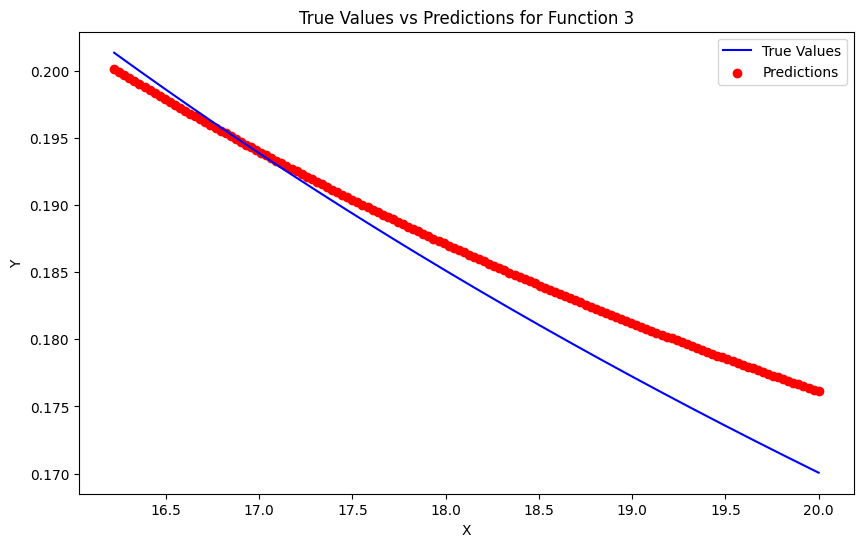

In [6]:
# Determine the split index for 80-20 split
split_index = int(0.8 * len(x))

# Split the data into train and test sets without shuffling
x_train_3, x_test_3 = x[:split_index], x[split_index:]
y_train_3, y_test_3 = y_values_3[:split_index], y_values_3[split_index:]

# Sort x_train_3 in ascending order
sorted_indices = np.argsort(x_train_3)
x_train_sorted_3 = x_train_3[sorted_indices]
y_train_sorted_3 = y_train_3[sorted_indices]

# Define the model
model = keras.Sequential([
    keras.layers.Dense(units=300, activation='elu', input_shape=(1,)),
    keras.layers.Dense(units=100, activation='tanh'),
    keras.layers.Dense(units=64, activation='tanh'),
    keras.layers.Dense(units=1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x_train_sorted_3, y_train_sorted_3, epochs=100, batch_size=32)

# Make predictions
predictions_3 = model.predict(x_test_3)

# Calculate R-squared score
r_squared_3 = r2_score(y_test_3, predictions_3)
r_squared_percentage_3 = r_squared_3 * 100
print("R-squared Score:", r_squared_percentage_3, "%")

# Calculate MSE for train and test data
train_mse_3 = model.evaluate(x_train_sorted_3, y_train_sorted_3, verbose=0)
test_mse_3 = model.evaluate(x_test_3, y_test_3, verbose=0)
print("Train MSE:", train_mse_3)
print("Test MSE:", test_mse_3)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(x_test_3, y_test_3, color='blue', label='True Values')
plt.scatter(x_test_3, predictions_3, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('True Values vs Predictions for Function 3')
plt.legend()
plt.show()

Train MSE: 0.5188310121481303
Test MSE: 2.0139053359377184


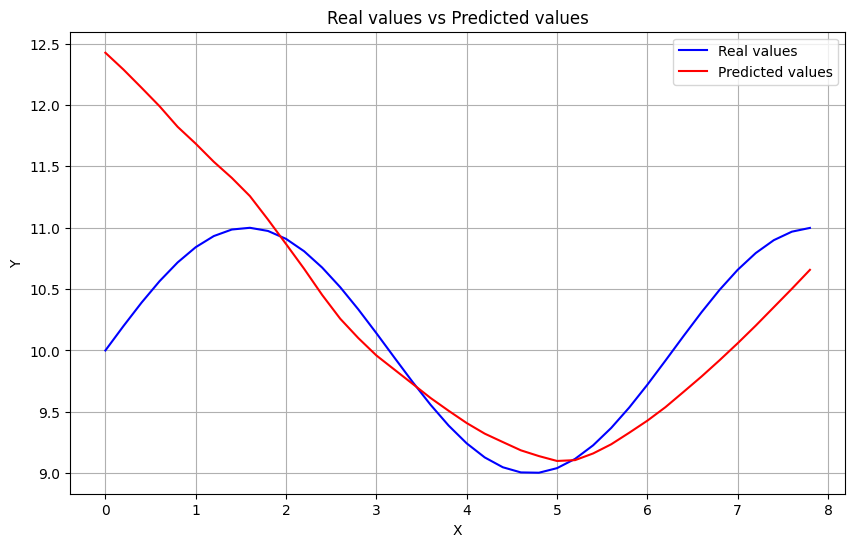

In [10]:
# Function to create input data for MLPRegressor
f = lambda x: [[x_] for x_ in x]

noise_level = 0.1
# Generating data
X_train_ = np.arange(0, 10, 0.2)
real_sin = np.sin(X_train_) + 10
y_train = real_sin + np.random.normal(0, noise_level, len(X_train_))

# Splitting dataset into train and test sets
split_ratio = 0.8
split_index = int(len(X_train_) * split_ratio)
X_train, X_test = X_train_[:split_index], X_train_[split_index:]
y_train, y_test = y_train[:split_index], y_train[split_index:]

# MLPRegressor training
N = 100
regr = MLPRegressor(hidden_layer_sizes=tuple([N] * 5)).fit(f(X_train), y_train)

# Predictions
predicted_train = regr.predict(f(X_train))
predicted_test = regr.predict(f(X_test))

# Calculate MSE
train_mse = mean_squared_error(y_train, predicted_train)
test_mse = mean_squared_error(y_test, predicted_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

plt.figure(figsize=(10, 6))
plt.plot(X_train, real_sin[:split_index], color='blue', label='Real values')
plt.plot(X_train, predicted_train, color='red', label='Predicted values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Real values vs Predicted values')
plt.legend()
plt.grid(True)
plt.show()

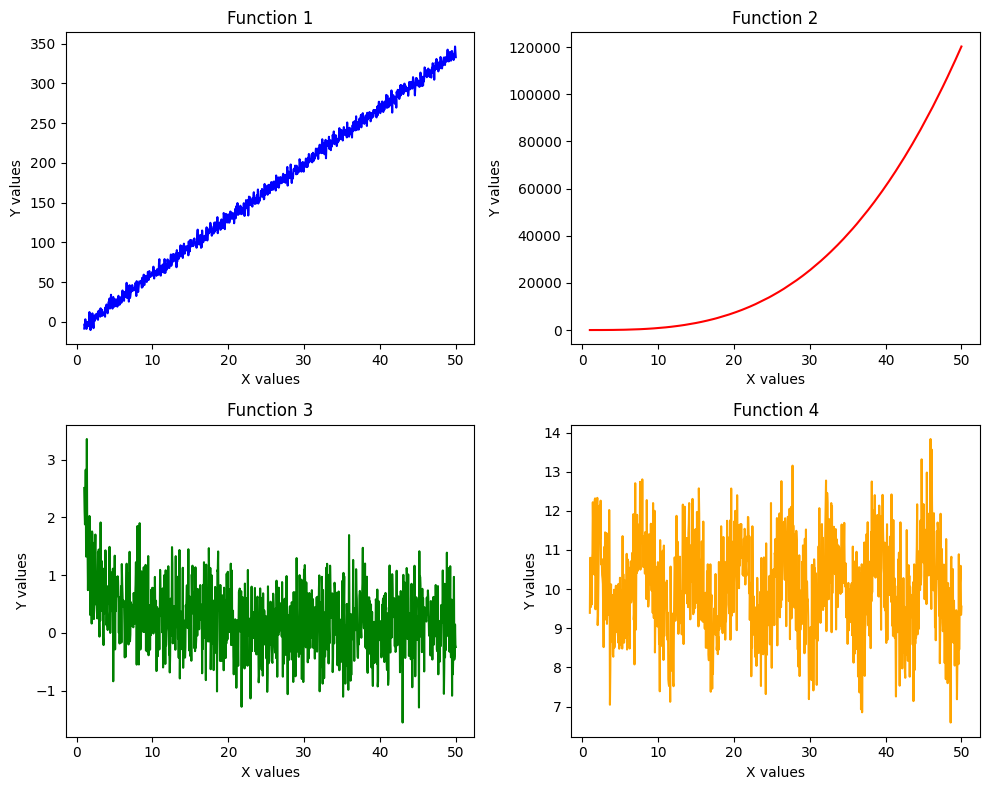

In [11]:
def function_1(x):
    return 7 * x - 11

def function_2(x):
    y = x ** 3 - 2 * x ** 2 + 5 * x - 17
    y[np.isnan(y)] = 0  # Replace NaN values with 0
    return y

def function_3(x):
    y = np.log(x + 10) / x
    y[np.isnan(y)] = 0  # Replace NaN values with 0
    return y

def function_4(x):
    return np.sin(x) + 10

# Generate x values
x = np.linspace(1, 50, 1000)

# Generate y values for each function and handle NaN values
y_values_1 = function_1(x) + np.random.normal(0, 5, len(x))  # Add Gaussian noise with mean 0 and standard deviation 5
y_values_2 = function_2(x) + np.random.normal(0, np.pi, len(x))  # Add Gaussian noise with mean 0 and standard deviation 50
y_values_3 = function_3(x) + np.random.normal(0, 0.5, len(x))  # Add Gaussian noise with mean 0 and standard deviation 0.5
y_values_4 = function_4(x) + np.random.normal(0, 1, len(x))  # Add Gaussian noise with mean 0 and standard deviation 1

# Check for NaN values in y_values after handling
if np.isnan(y_values_1).any() or np.isnan(y_values_2).any() or np.isnan(y_values_3).any() or np.isnan(y_values_4).any():
    raise ValueError("Input y contains NaN values.")

# Plot each function in a separate plot
plt.figure(figsize=(10, 8))

# Plot for function 1
plt.subplot(221)
plt.plot(x, y_values_1, color='blue')
plt.title('Function 1')
plt.xlabel('X values')
plt.ylabel('Y values')

# Plot for function 2
plt.subplot(222)
plt.plot(x, y_values_2, color='red')
plt.title('Function 2')
plt.xlabel('X values')
plt.ylabel('Y values')

# Plot for function 3
plt.subplot(223)
plt.plot(x, y_values_3, color='green')
plt.title('Function 3')
plt.xlabel('X values')
plt.ylabel('Y values')

# Plot for function 4
plt.subplot(224)
plt.plot(x, y_values_4, color='orange')
plt.title('Function 4')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.tight_layout()
plt.show()

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 20812.1328
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 11576.8438
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 2288.2202
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 114.8054
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 72.7186
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 69.3009
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 67.4895
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 66.4920
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 65.3631
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 64.2244
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 63.2750
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 61.8937
Epoch 13/100
25/

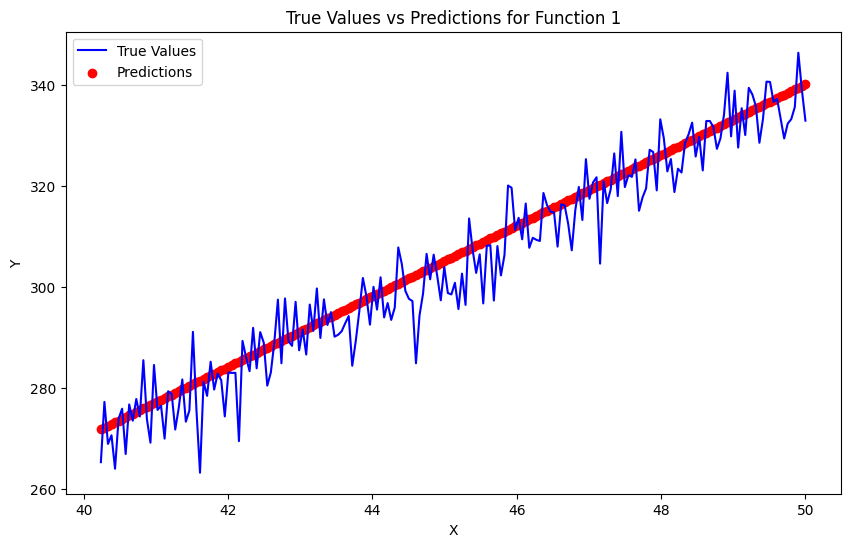

In [12]:
# Determine the split index for 80-20 split
split_index = int(0.8 * len(x))

# Split the data into train and test sets without shuffling
x_train_1, x_test_1 = x[:split_index], x[split_index:]
y_train_1, y_test_1 = y_values_1[:split_index], y_values_1[split_index:]

# Sort x_train_1 in ascending order
sorted_indices = np.argsort(x_train_1)
x_train_sorted_1 = x_train_1[sorted_indices]
y_train_sorted_1 = y_train_1[sorted_indices]

# Reshape input data to have a shape of (batch_size, 1)
x_train_sorted_1 = x_train_sorted_1.reshape(-1, 1)
x_test_1 = x_test_1.reshape(-1, 1)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(units=100, activation='relu', input_shape=(1,)),
    keras.layers.Dense(units=300, activation='relu'),
    keras.layers.Dense(units=1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x_train_sorted_1, y_train_sorted_1, epochs=100, batch_size=32)

# Make predictions
predictions_1 = model.predict(x_test_1)

# Calculate R-squared score
r_squared_1 = r2_score(y_test_1, predictions_1)
r_squared_percentage_1 = r_squared_1 * 100
print("R-squared Score:", r_squared_percentage_1, "%")

# Calculate MSE for train and test data
train_mse_1 = model.evaluate(x_train_sorted_1, y_train_sorted_1, verbose=0)
test_mse_1 = model.evaluate(x_test_1, y_test_1, verbose=0)
print("Train MSE:", train_mse_1)
print("Test MSE:", test_mse_1)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(x_test_1, y_test_1, color='blue', label='True Values')
plt.scatter(x_test_1, predictions_1, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('True Values vs Predictions for Function 1')
plt.legend()
plt.show()

Epoch 1/300
25/25 [==============================] - 1s 3ms/step - loss: 536550272.0000
Epoch 2/300
25/25 [==============================] - 0s 3ms/step - loss: 355577728.0000
Epoch 3/300
25/25 [==============================] - 0s 3ms/step - loss: 117269320.0000
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 98639720.0000
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 86639248.0000
Epoch 6/300
25/25 [==============================] - 0s 3ms/step - loss: 70883224.0000
Epoch 7/300
25/25 [==============================] - 0s 3ms/step - loss: 48807240.0000
Epoch 8/300
25/25 [==============================] - 0s 3ms/step - loss: 33408616.0000
Epoch 9/300
25/25 [==============================] - 0s 3ms/step - loss: 20652916.0000
Epoch 10/300
25/25 [==============================] - 0s 3ms/step - loss: 13822676.0000
Epoch 11/300
25/25 [==============================] - 0s 3ms/step - loss: 10290222.0000
Epoch 12/300
25/25 [==================

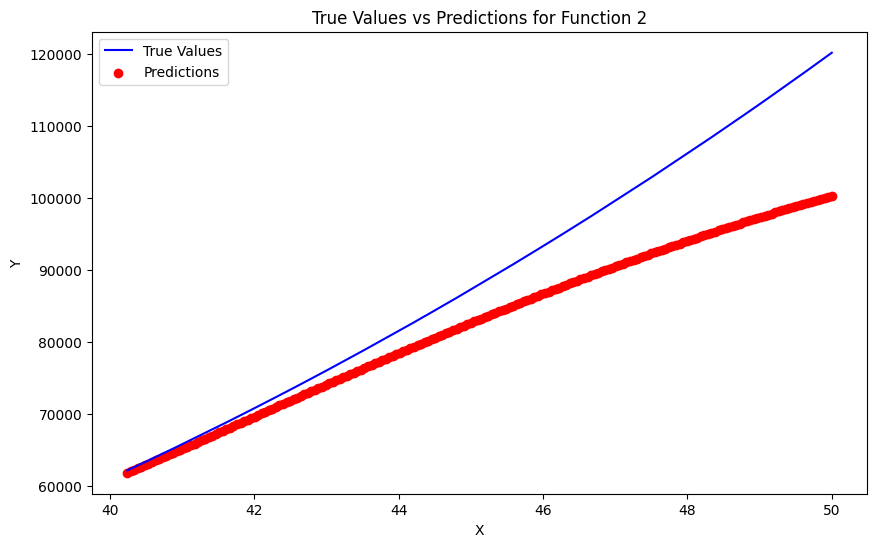

In [13]:
# Determine the split index for 80-20 split
split_index = int(0.8 * len(x))

# Split the data into train and test sets without shuffling
x_train_2, x_test_2 = x[:split_index], x[split_index:]
y_train_2, y_test_2 = y_values_2[:split_index], y_values_2[split_index:]

# Sort x_train_2 in ascending order
sorted_indices = np.argsort(x_train_2)
x_train_sorted_2 = x_train_2[sorted_indices]
y_train_sorted_2 = y_train_2[sorted_indices]

# Define the model
model = keras.Sequential([
    keras.layers.Dense(units=100, activation='elu', input_shape=(1,)),
    keras.layers.Dense(units=1500, activation='swish'),
    keras.layers.Dense(units=300, activation='elu'),
    keras.layers.Dense(units=1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x_train_sorted_2, y_train_sorted_2, epochs=300, batch_size=32)

# Make predictions
predictions_2 = model.predict(x_test_2)

# Calculate R-squared score
r_squared_2 = r2_score(y_test_2, predictions_2)
r_squared_percentage_2 = r_squared_2 * 100
print("R-squared Score:", r_squared_percentage_2, "%")

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(x_test_2, y_test_2, color='blue', label='True Values')
plt.scatter(x_test_2, predictions_2, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('True Values vs Predictions for Function 2')
plt.legend()
plt.show()

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 53.0975
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3175
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2942
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2861
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2842
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2852
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2803
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2845
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2741
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2758
Epoch 11/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2749
Epoch 12/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2753
Epoch 13/100
25/25 [================

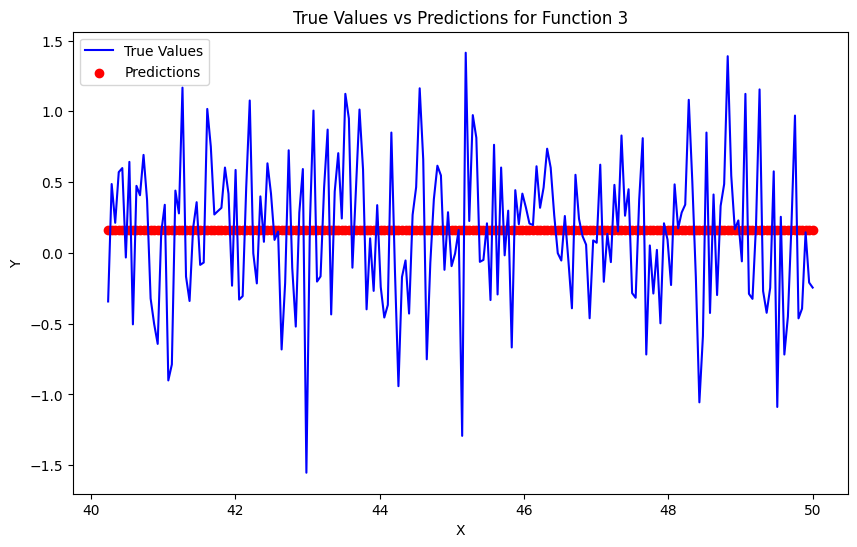

In [14]:
# Determine the split index for 80-20 split
split_index = int(0.8 * len(x))

# Split the data into train and test sets without shuffling
x_train_3, x_test_3 = x[:split_index], x[split_index:]
y_train_3, y_test_3 = y_values_3[:split_index], y_values_3[split_index:]

# Sort x_train_3 in ascending order
sorted_indices = np.argsort(x_train_3)
x_train_sorted_3 = x_train_3[sorted_indices]
y_train_sorted_3 = y_train_3[sorted_indices]

# Define the model
model = keras.Sequential([
    keras.layers.Dense(units=1000, activation='elu', input_shape=(1,)),
    keras.layers.Dense(units=3000, activation='tanh'),
    keras.layers.Dense(units=1000, activation='tanh'),
    keras.layers.Dense(units=1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x_train_sorted_3, y_train_sorted_3, epochs=100, batch_size=32)

# Make predictions
predictions_3 = model.predict(x_test_3)

# Calculate MSE for train and test data
train_mse_3 = model.evaluate(x_train_sorted_3, y_train_sorted_3, verbose=0)
test_mse_3 = model.evaluate(x_test_3, y_test_3, verbose=0)
print("Train MSE:", train_mse_3)
print("Test MSE:", test_mse_3)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(x_test_3, y_test_3, color='blue', label='True Values')
plt.scatter(x_test_3, predictions_3, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('True Values vs Predictions for Function 3')
plt.legend()
plt.show()

Train MSE: 0.017731024358714514
Test MSE: 2.966921804799532


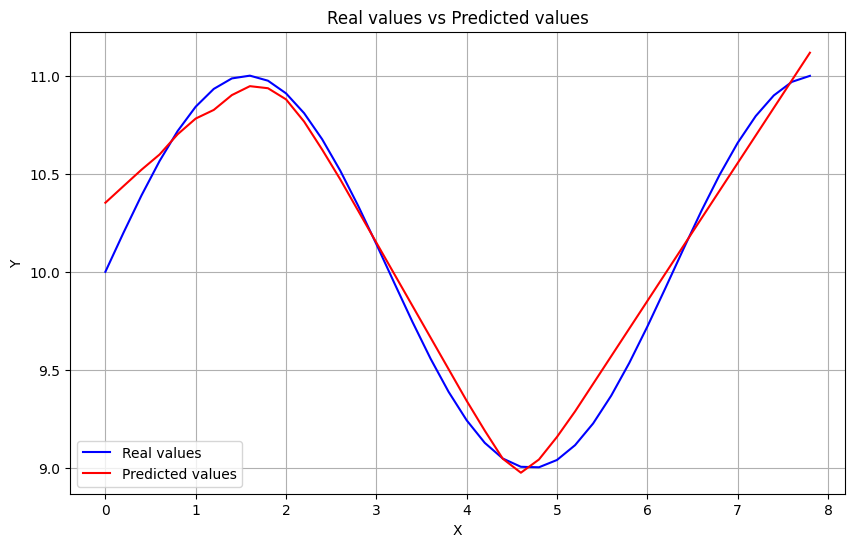

In [16]:
# Function to create input data for MLPRegressor
f = lambda x: [[x_] for x_ in x]

# Generating data
X_train_ = np.arange(0, 10, 0.2)
real_sin = np.sin(X_train_) + 10
y_train = real_sin + np.random.normal(0, noise_level, len(X_train_))

# Splitting dataset into train and test sets
split_ratio = 0.8
split_index = int(len(X_train_) * split_ratio)
X_train, X_test = X_train_[:split_index], X_train_[split_index:]
y_train, y_test = y_train[:split_index], y_train[split_index:]

# MLPRegressor training
N = 100
regr = MLPRegressor(hidden_layer_sizes=tuple([N] * 5)).fit(f(X_train), y_train)

# Predictions
predicted_train = regr.predict(f(X_train))
predicted_test = regr.predict(f(X_test))

# Calculate MSE
train_mse = mean_squared_error(y_train, predicted_train)
test_mse = mean_squared_error(y_test, predicted_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

plt.figure(figsize=(10, 6))
plt.plot(X_train, real_sin[:split_index], color='blue', label='Real values')
plt.plot(X_train, predicted_train, color='red', label='Predicted values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Real values vs Predicted values')
plt.legend()
plt.grid(True)
plt.show()